<a href="https://colab.research.google.com/github/jmbmartins/ConvolutionalNeuralNetworksProject/blob/main/Pratical_Project_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INITIAL SCRIPT GIVEN BY THE PROF**:

170498071/170498071 [==============================] - 4s 0us/step
Learning set:
X: (50000, 32, 32, 3)
y: (50000, 1)
Test set:
X: (10000, 32, 32, 3)
y: (10000, 1)
Original (integer) label for the first training sample:  [6]
After conversion to categorical one-hot encoded labels:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
       

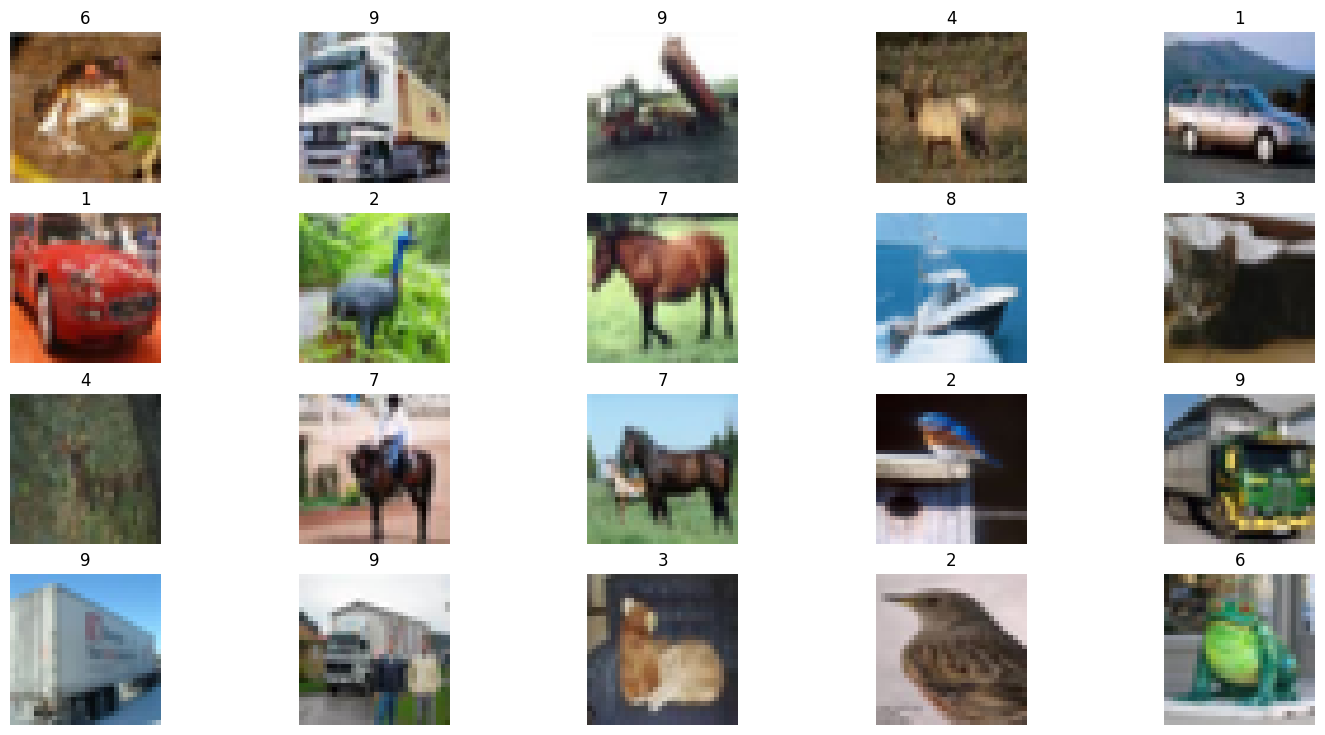

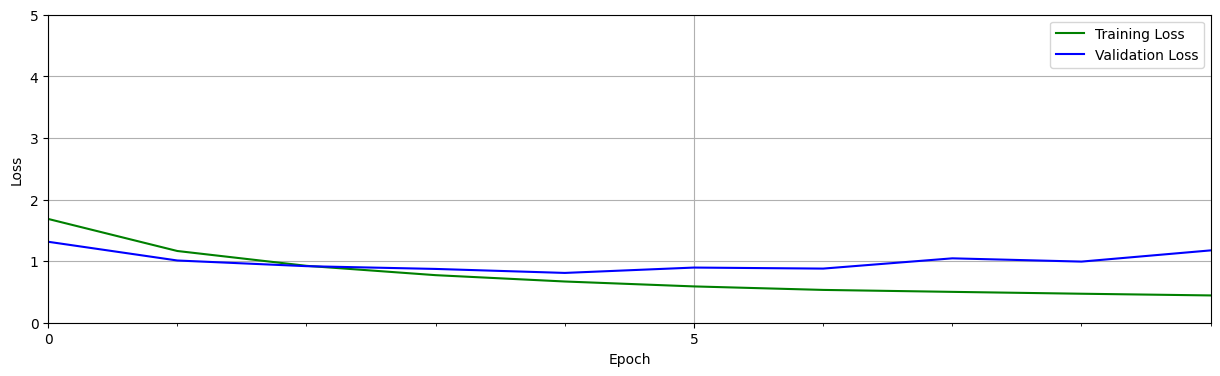

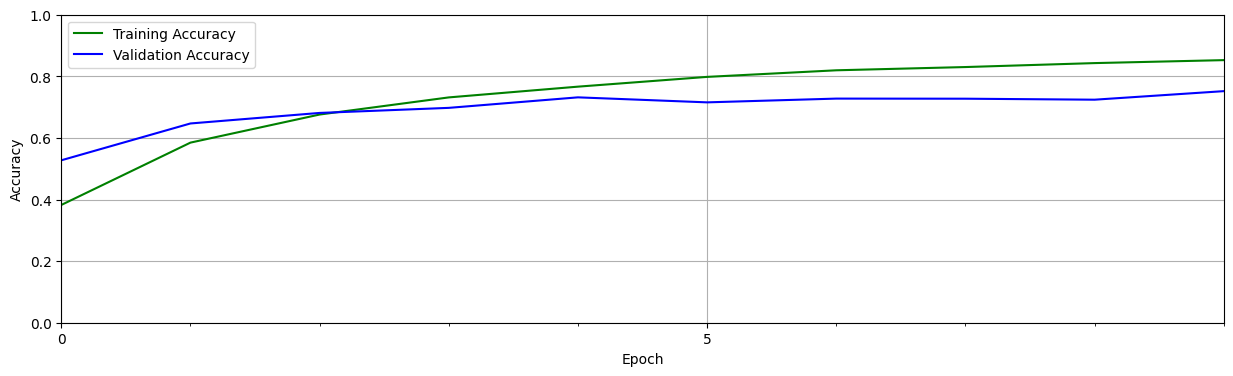

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

SEED_VALUE = 42

# Fix seed to make training deterministic.
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)


# ##########################################################################
#	FX
# ##########################################################################



def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):

    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 9])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()


def cnn_model(input_shape=(32, 32, 3)):

    model = Sequential()

    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

# ##########################################################################

# Load the dataset (CIFAR-10)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('Learning set:')
print('X: ', end='')
print(X_train.shape)
print('y: ', end='')
print(y_train.shape)

print('Test set:')
print('X: ', end='')
print(X_test.shape)
print('y: ', end='')
print(y_test.shape)

# DEBUG. Plot some of the images
plt.figure(figsize=(18, 9))

num_rows = 4
num_cols = 5

# plot each of the images in the batch and the associated ground truth labels.
for i in range(num_rows*num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i,:,:])
    ax.title.set_text(y_train[i,0])
    plt.axis("off")

# Normalize images to the range [0, 1].
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32") / 255

# Change the labels from integer to categorical data.
print('Original (integer) label for the first training sample: ', y_train[0])

# Convert labels to one-hot encoding.
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

print('After conversion to categorical one-hot encoded labels: ', y_train[0])

# Create the model.
model = cnn_model()
model.summary()

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
             )

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    verbose=1,
                    validation_split=.3,
                   )


# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

**3. Divide the available datasets into learn/validation and test subsets, in order to create models that predict:**

a. ID;

Training the ID model...
Epoch 1/10
Train - Loss: 7.6098442056006, Accuracy: 0.2061491935483871
Validation - Loss: 1.8770191037073367, Accuracy: 0.5625
Epoch 2/10
Train - Loss: 0.7591033626829871, Accuracy: 0.8090725806691954
Validation - Loss: 0.5677904112309944, Accuracy: 0.8547473869672636
Epoch 3/10
Train - Loss: 0.1517905009520104, Accuracy: 0.9654233871448424
Validation - Loss: 0.5948105695322561, Accuracy: 0.8991724739714366
Epoch 4/10
Train - Loss: 0.11389103127606998, Accuracy: 0.9758064516129032
Validation - Loss: 0.8414354782812108, Accuracy: 0.9100609756097561
Epoch 5/10
Train - Loss: 0.14769765444120142, Accuracy: 0.985383064516129
Validation - Loss: 1.9069216892274534, Accuracy: 0.8689024390243902
Epoch 6/10
Train - Loss: 0.07064223334121295, Accuracy: 0.9884072580645161
Validation - Loss: 1.859276957302914, Accuracy: 0.8945993032397294
Epoch 7/10
Train - Loss: 0.10148722898523871, Accuracy: 0.9863911290322581
Validation - Loss: 2.8662959941937936, Accuracy: 0.88567073170

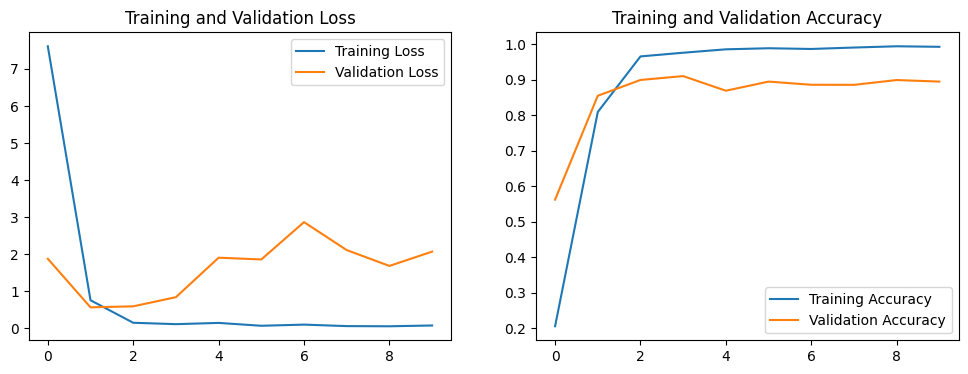

21/21 [==============================] - 3s 72ms/step
Top 10 IDs by Precision:
    precision    recall  f1-score  support
33        1.0  0.875000  0.933333      8.0
73        1.0  0.666667  0.800000      3.0
72        1.0  1.000000  1.000000      4.0
32        1.0  1.000000  1.000000     14.0
67        1.0  0.250000  0.400000      4.0
34        1.0  1.000000  1.000000      5.0
35        1.0  1.000000  1.000000     11.0
71        1.0  1.000000  1.000000      4.0
38        1.0  1.000000  1.000000     12.0
41        1.0  0.923077  0.960000     13.0

Bottom 10 IDs by Precision:
    precision    recall  f1-score  support
47   0.600000  1.000000  0.750000      6.0
49   0.615385  1.000000  0.761905      8.0
29   0.625000  0.833333  0.714286     12.0
58   0.666667  0.666667  0.666667      3.0
39   0.700000  0.933333  0.800000     15.0
31   0.750000  0.900000  0.818182     10.0
7    0.769231  1.000000  0.869565     10.0
75   0.777778  1.000000  0.875000      7.0
11   0.777778  1.000000  0.87500

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from numpy import argmax
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

SEED_VALUE = 42

# Fix seed to make training deterministic.
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

# Define the image dimensions
img_rows, img_cols = 256, 256

# Define the batch size and number of epochs
batch_size = 8
epochs = 10

# Define the path to the dataset
dataset_path = "/content/drive/MyDrive/Colab Notebooks/AR (1)/AR_out"


# ---------------------------- Modified Part - ID ------------------------------------

# Load the dataset
X = []
y = []

# Load the images and labels into X and y respectively
for filename in os.listdir(dataset_path):
    if filename.endswith(".jpg"):
        img = load_img(os.path.join(dataset_path, filename), target_size=(img_rows, img_cols))
        X.append(img_to_array(img))
        id = filename.split('-')[1]  # Assuming the ID is the first part of the filename, separated by '-'
        y.append(int(id))

# Convert y to integer IDs
unique_ids = list(set(y))
id_to_int = {id: i for i, id in enumerate(unique_ids)}
y = [id_to_int[id] for id in y]

# Convert y to one-hot encoding
num_classes = len(unique_ids)
y = to_categorical(y, num_classes)

# -----------------------------------------------------------------------------------------------------

# Re-shape
X = np.array(X).reshape(-1, img_rows, img_cols, 3)
y = np.array(y)


# Split the dataset into training/validation and test subsets
# 20% - Test || 20% - Validation || 60% - Train
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED_VALUE)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=SEED_VALUE)  # 0.25 x 0.8 = 0.2


# Create the model
def cnn_model(input_shape=(img_rows, img_cols, 3), num_classes=num_classes):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Create the ID model
cnn_model = cnn_model(input_shape=(img_rows, img_cols, 3), num_classes=num_classes)
cnn_model.compile(optimizer=RMSprop(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Train the ID model
print("Training the ID model...")

# Create data generators
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

# Training loop using train_on_batch
train_loss = []
train_acc = []
val_loss = []
val_acc = []

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")

    train_loss_epoch = []
    train_acc_epoch = []
    val_loss_epoch = []
    val_acc_epoch = []

    for step in range(len(X_train) // batch_size):
        X_batch, y_batch = next(train_generator)
        loss, acc = cnn_model.train_on_batch(X_batch, y_batch) # Change Network Architectures (CNN or VGG)
        train_loss_epoch.append(loss)
        train_acc_epoch.append(acc)

    for step in range(len(X_val) // batch_size):
        X_batch, y_batch = next(val_generator)
        loss, acc = cnn_model.test_on_batch(X_batch, y_batch) # Change Network Architectures (CNN or VGG)
        val_loss_epoch.append(loss)
        val_acc_epoch.append(acc)

    avg_train_loss = np.mean(train_loss_epoch)
    avg_train_acc = np.mean(train_acc_epoch)
    avg_val_loss = np.mean(val_loss_epoch)
    avg_val_acc = np.mean(val_acc_epoch)

    print(f"Train - Loss: {avg_train_loss}, Accuracy: {avg_train_acc}")
    print(f"Validation - Loss: {avg_val_loss}, Accuracy: {avg_val_acc}")

    train_loss.append(avg_train_loss)
    train_acc.append(avg_train_acc)
    val_loss.append(avg_val_loss)
    val_acc.append(avg_val_acc)

# Calculate the average loss and accuracy over all epochs
avg_train_loss_all_epochs = np.mean(train_loss)
avg_train_acc_all_epochs = np.mean(train_acc)
avg_val_loss_all_epochs = np.mean(val_loss)
avg_val_acc_all_epochs = np.mean(val_acc)

# Average in Training
print(f"Train - Average Loss over all epochs: {avg_train_loss_all_epochs}, Average Accuracy over all epochs: {avg_train_acc_all_epochs}")
print(f"Validation - Average Loss over all epochs: {avg_val_loss_all_epochs}, Average Accuracy over all epochs: {avg_val_acc_all_epochs}")

# Create a test data generator
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow(X_test, y_test, batch_size=batch_size)

# Test loop
test_loss = []
test_acc = []

print("Testing the model...")

for step in range(len(X_test) // batch_size):
    X_batch, y_batch = next(test_generator)
    loss, acc = cnn_model.test_on_batch(X_batch, y_batch)
    test_loss.append(loss)
    test_acc.append(acc)

avg_test_loss = round(np.mean(test_loss), 3)
avg_test_acc = round(np.mean(test_acc), 3)

print(f"Test - Loss: {avg_test_loss}, Accuracy: {avg_test_acc}")


# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.show()


# Added some Statistics
# Get the predicted labels for the test set
y_pred = cnn_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Convert y_test back from one-hot encoding to labels
y_test_labels = np.argmax(y_test, axis=1)

# Get the classification report
report = classification_report(y_test_labels, y_pred, output_dict=True)

# Convert the report to a DataFrame for easier manipulation
report_df = pd.DataFrame(report).transpose()

# Sort by precision and recall and get the top and bottom 10 IDs
top_10_precision = report_df.sort_values(by='precision', ascending=False).head(10)
bottom_10_precision = report_df.sort_values(by='precision', ascending=True).head(10)

top_10_recall = report_df.sort_values(by='recall', ascending=False).head(10)
bottom_10_recall = report_df.sort_values(by='recall', ascending=True).head(10)

print("Top 10 IDs by Precision:")
print(top_10_precision)

print("\nBottom 10 IDs by Precision:")
print(bottom_10_precision)

print("\nTop 10 IDs by Recall:")
print(top_10_recall)

print("\nBottom 10 IDs by Recall:")
print(bottom_10_recall)



**3. Divide the available datasets into learn/validation and test subsets, in order to create models that predict:**

b. Facial expression;

Detected classes: ['scream', 'neutral', 'smile', 'anger']
Features: ['scream', 'neutral', 'smile', 'anger']
expression_to_int: {'scream': 0, 'neutral': 1, 'smile': 2, 'anger': 3}
y: [0, 2, 3, 1, 3, 0, 1, 2, 3, 0, 3, 0, 1, 2, 0, 3, 3, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 3, 2, 0, 1, 3, 1, 2, 3, 0, 0, 2, 1, 1, 2, 3, 1, 0, 0, 0, 3, 0, 2, 3, 2, 0, 1, 3, 1, 0, 2, 0, 1, 3, 2, 3, 2, 2, 3, 1, 1, 0, 0, 2, 2, 1, 2, 3, 3, 2, 1, 0, 1, 3, 0, 3, 2, 2, 1, 3, 1, 0, 3, 0, 2, 3, 3, 1, 0, 1, 0, 3, 0, 2, 0, 2, 1, 3, 1, 3, 3, 2, 0, 2, 0, 0, 3, 1, 1, 0, 3, 3, 2, 1, 0, 2, 2, 3, 3, 2, 0, 2, 0, 1, 1, 1, 0, 3, 1, 0, 0, 2, 0, 1, 2, 0, 3, 0, 3, 2, 2, 1, 3, 3, 1, 3, 0, 1, 1, 2, 2, 2, 1, 2, 0, 3, 3, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 3, 3, 0, 2, 3, 2, 3, 1, 3, 0, 0, 2, 1, 3, 1, 3, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 3, 1, 2, 0, 1, 1, 3, 3, 2, 2, 1, 2, 0, 0, 3, 3, 1, 0, 0, 0, 0, 1, 3, 3, 2, 1, 0, 0, 1, 1, 3, 1, 1, 2, 3, 2, 2, 0, 0, 3, 3, 2, 0, 2, 1, 0, 0, 2, 2, 3, 2, 1, 2, 1, 3, 0, 3, 3, 2, 0, 1, 2, 1, 1, 0, 3, 0, 3, 3, 0, 1, 1, 1

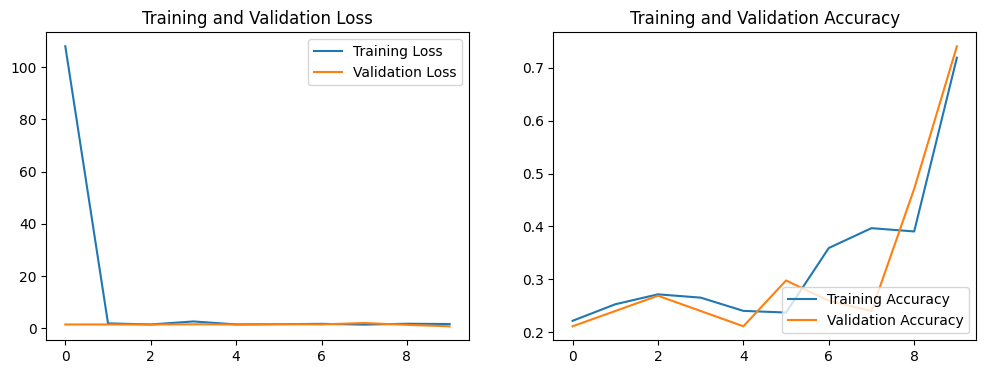

4/4 [==============================] - 0s 30ms/step
Class '0':
Precision: 0.8275862068965517
Recall: 0.96
F1-score: 0.888888888888889
Support: 25

Class '1':
Precision: 0.5
Recall: 0.42857142857142855
F1-score: 0.4615384615384615
Support: 28

Class '2':
Precision: 0.782608695652174
Recall: 0.72
F1-score: 0.7499999999999999
Support: 25

Class '3':
Precision: 0.5625
Recall: 0.6
F1-score: 0.5806451612903225
Support: 30

Confusion Matrix:
 [[24  0  0  1]
 [ 1 12  3 12]
 [ 4  2 18  1]
 [ 0 10  2 18]]


In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16

from sklearn.metrics import classification_report, confusion_matrix

SEED_VALUE = 42

# Fix seed to make training deterministic.
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

# Define the image dimensions
img_rows, img_cols = 256, 256

# Define the batch size and number of epochs
batch_size = 8
epochs = 10

# Define the path to the dataset
dataset_path = "/content/drive/MyDrive/Colab Notebooks/AR (1)/AR_out"

# Load the dataset
X = []
y = []

# ---------------------------- Modified Part - Facial Expression ------------------------------------


# Define the mapping from 'y' to facial expression

feature_id_to_expression = {
    '1': 'neutral',
    '2': 'smile',
    '3': 'anger',
    '4': 'scream',
    # Add other mappings
}

for filename in os.listdir(dataset_path):
    if filename.endswith(".jpg"):
        feature_id = filename.split('-')[2].split('.')[0]  # Extract 'yy' from the filename
        expression = feature_id_to_expression.get(feature_id)  # Map 'yy' to facial expression
        if expression is not None:  # Only consider images corresponding to the four classes
            img = load_img(os.path.join(dataset_path, filename), target_size=(img_rows, img_cols))
            X.append(img_to_array(img))
            y.append(expression)

# Convert y to integer expressions
unique_expressions = list(set(y))
print("Detected classes:", unique_expressions)
print("Features:", unique_expressions)


expression_to_int = {expression: i for i, expression in enumerate(unique_expressions)}
print("expression_to_int:", expression_to_int)
y = [expression_to_int[expression] for expression in y]
print("y:", y)
# Convert y to one-hot encoding
num_classes = len(unique_expressions)
print("Classes Number: ", num_classes)

# -------------------------------------------------------------------------------------------


# Re-shape
X = np.array(X).reshape(-1, img_rows, img_cols, 3)
y = np.array(y)

# Split the dataset into training/validation and test subsets
# 20% - Test || 20% - Validation || 60% - Train
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED_VALUE)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=SEED_VALUE)  # 0.25 x 0.8 = 0.2

y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

# Create the model
def cnn_model(input_shape=(img_rows, img_cols, 3), num_classes=num_classes):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Create the ID model
cnn_model = cnn_model(input_shape=(img_rows, img_cols, 3), num_classes=num_classes)
cnn_model.compile(optimizer=RMSprop(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Train the ID model
print("Training the ID model...")

# Create data generators
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

# Training loop using train_on_batch
train_loss = []
train_acc = []
val_loss = []
val_acc = []

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")

    train_loss_epoch = []
    train_acc_epoch = []
    val_loss_epoch = []
    val_acc_epoch = []

    for step in range(len(X_train) // batch_size):
        X_batch, y_batch = next(train_generator)
        loss, acc = cnn_model.train_on_batch(X_batch, y_batch) # Change Network Architectures (CNN or VGG)
        train_loss_epoch.append(loss)
        train_acc_epoch.append(acc)

    for step in range(len(X_val) // batch_size):
        X_batch, y_batch = next(val_generator)
        loss, acc = cnn_model.test_on_batch(X_batch, y_batch) # Change Network Architectures (CNN or VGG)
        val_loss_epoch.append(loss)
        val_acc_epoch.append(acc)

    avg_train_loss = np.mean(train_loss_epoch)
    avg_train_acc = np.mean(train_acc_epoch)
    avg_val_loss = np.mean(val_loss_epoch)
    avg_val_acc = np.mean(val_acc_epoch)

    print(f"Train - Loss: {avg_train_loss}, Accuracy: {avg_train_acc}")
    print(f"Validation - Loss: {avg_val_loss}, Accuracy: {avg_val_acc}")

    train_loss.append(avg_train_loss)
    train_acc.append(avg_train_acc)
    val_loss.append(avg_val_loss)
    val_acc.append(avg_val_acc)

# Calculate the average loss and accuracy over all epochs
avg_train_loss_all_epochs = round(np.mean(train_loss),3)
avg_train_acc_all_epochs = round(np.mean(train_acc), 3)
avg_val_loss_all_epochs = round(np.mean(val_loss), 3)
avg_val_acc_all_epochs = round(np.mean(val_acc), 3)

# Average in Training
print(f"Train - Average Loss over all epochs: {avg_train_loss_all_epochs}, Average Accuracy over all epochs: {avg_train_acc_all_epochs}")
print(f"Validation - Average Loss over all epochs: {avg_val_loss_all_epochs}, Average Accuracy over all epochs: {avg_val_acc_all_epochs}")

# Create a test data generator
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow(X_test, y_test, batch_size=batch_size)

# Test loop
test_loss = []
test_acc = []

print("Testing the model...")

for step in range(len(X_test) // batch_size):
    X_batch, y_batch = next(test_generator)
    loss, acc = cnn_model.test_on_batch(X_batch, y_batch)
    test_loss.append(loss)
    test_acc.append(acc)

avg_test_loss = np.mean(test_loss)
avg_test_acc = np.mean(test_acc)

print(f"Test - Loss: {avg_test_loss}, Accuracy: {avg_test_acc}")


# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.show()

# Added Statistics
# After training and testing the model, get the predictions on the test set
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded y_test to class labels
y_test_classes = np.argmax(y_test, axis=1)

# Compute classification report
report = classification_report(y_test_classes, y_pred_classes, labels=list(range(num_classes)), output_dict=True, zero_division=0)

# Print the precision, recall, f1-score, and support for all classes
for class_label in class_labels:
    print(f"Class '{class_label}':")
    print(f"Precision: {report[class_label]['precision']}")
    print(f"Recall: {report[class_label]['recall']}")
    print(f"F1-score: {report[class_label]['f1-score']}")
    print(f"Support: {report[class_label]['support']}")
    print()

# Compute confusion matrix
conf_mat = confusion_matrix(y_test_classes, y_pred_classes)

print("Confusion Matrix:\n", conf_mat)





> **3. Divide the available datasets into learn/validation and test subsets, in order to create models that predict:**

c. Gender;



Detected classes: ['women', 'male']
Classes Number:  2
Shape of X: (3315, 256, 256, 3)
Shape of y: (3315, 2)
Shape of X_train: (1989, 256, 256, 3)
Shape of y_train: (1989, 2)
Shape of X_val: (663, 256, 256, 3)
Shape of y_val: (663, 2)
Shape of X_test: (663, 256, 256, 3)
Shape of y_test: (663, 2)
Training the ID model...
Epoch 1/10
Train - Loss: 40.383818926620144, Accuracy: 0.7706653225806451
Validation - Loss: 0.45002375214883106, Accuracy: 0.8490853658536586
Epoch 2/10
Train - Loss: 0.4526357835535647, Accuracy: 0.9137096775154914
Validation - Loss: 0.31210573161128774, Accuracy: 0.8976480837275342
Epoch 3/10
Train - Loss: 0.23783340419153173, Accuracy: 0.9450604838709677
Validation - Loss: 0.15352443479050856, Accuracy: 0.9451219512195121
Epoch 4/10
Train - Loss: 0.14085486510394873, Accuracy: 0.9747983870967742
Validation - Loss: 0.11427416247557311, Accuracy: 0.9771341463414634
Epoch 5/10
Train - Loss: 0.12737533359168576, Accuracy: 0.9823588709677419
Validation - Loss: 0.26952482

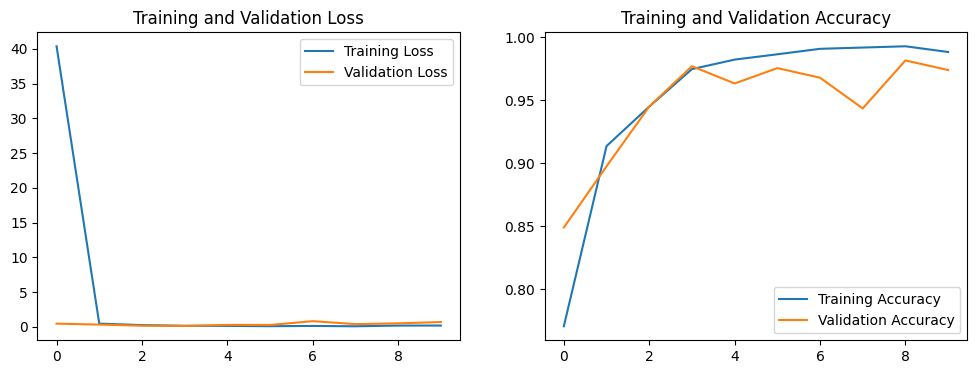

83/83 [==============================] - 1s 11ms/step
              precision    recall  f1-score     support
0              0.976190  0.976190  0.976190  294.000000
1              0.981030  0.981030  0.981030  369.000000
accuracy       0.978884  0.978884  0.978884    0.978884
macro avg      0.978610  0.978610  0.978610  663.000000
weighted avg   0.978884  0.978884  0.978884  663.000000
[[287   7]
 [  7 362]]


In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from sklearn.metrics import classification_report, confusion_matrix

SEED_VALUE = 42

# Fix seed to make training deterministic.
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

# Define the image dimensions
img_rows, img_cols = 256, 256

# Define the batch size and number of epochs
batch_size = 8
epochs = 10

# Define the path to the dataset
dataset_path = "/content/drive/MyDrive/Colab Notebooks/AR (1)/AR_out"

# Load the dataset
X = []
y = []

# ---------------------------- Modified Part - Gender ------------------------------------

feature_id_to_gender = {
    'm': 'male',
    'w': 'women',
    # Add other mappings if necessary
}

for filename in os.listdir(dataset_path):
    if filename.endswith(".jpg"):
        gender_id = filename[0]  # Extract the gender identifier from the filename
        gender = feature_id_to_gender.get(gender_id)  # Map the gender identifier to a gender label
        if gender is not None:  # Only consider images with valid gender labels
            img = load_img(os.path.join(dataset_path, filename), target_size=(img_rows, img_cols))
            X.append(img_to_array(img))
            y.append(gender)

unique_genders = list(set(y))
print("Detected classes:", unique_genders)

gender_to_int = {gender: i for i, gender in enumerate(unique_genders)}
y = [gender_to_int[gender] for gender in y]

num_classes = len(unique_genders)
print("Classes Number: ", num_classes)

y = to_categorical(y, num_classes)

# -------------------------------------------------------------------------------------------

# Re-shape
X = np.array(X).reshape(-1, img_rows, img_cols, 3)
y = np.array(y)

# After loading and preprocessing the data
print("Shape of X:", np.shape(X))
print("Shape of y:", np.shape(y))


# Split the dataset into training/validation and test subsets
# 20% - Test || 20% - Validation || 60% - Train
# After splitting the data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED_VALUE)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=SEED_VALUE)  # 0.25 x 0.8 = 0.2

# After splitting the data
print("Shape of X_train:", np.shape(X_train))
print("Shape of y_train:", np.shape(y_train))
print("Shape of X_val:", np.shape(X_val))
print("Shape of y_val:", np.shape(y_val))
print("Shape of X_test:", np.shape(X_test))
print("Shape of y_test:", np.shape(y_test))

# Create the model
def cnn_model(input_shape=(img_rows, img_cols, 3), num_classes=num_classes):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Create the ID model
cnn_model = cnn_model(input_shape=(img_rows, img_cols, 3), num_classes=num_classes)
cnn_model.compile(optimizer=RMSprop(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Train the ID model
print("Training the ID model...")

# Create data generators
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

# Training loop using train_on_batch
train_loss = []
train_acc = []
val_loss = []
val_acc = []

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")

    train_loss_epoch = []
    train_acc_epoch = []
    val_loss_epoch = []
    val_acc_epoch = []

    for step in range(len(X_train) // batch_size):
        X_batch, y_batch = next(train_generator)
        loss, acc = cnn_model.train_on_batch(X_batch, y_batch) # Change Network Architectures (CNN or VGG)
        train_loss_epoch.append(loss)
        train_acc_epoch.append(acc)

    for step in range(len(X_val) // batch_size):
        X_batch, y_batch = next(val_generator)
        loss, acc = cnn_model.test_on_batch(X_batch, y_batch) # Change Network Architectures (CNN or VGG)
        val_loss_epoch.append(loss)
        val_acc_epoch.append(acc)

    avg_train_loss = np.mean(train_loss_epoch)
    avg_train_acc = np.mean(train_acc_epoch)
    avg_val_loss = np.mean(val_loss_epoch)
    avg_val_acc = np.mean(val_acc_epoch)

    print(f"Train - Loss: {avg_train_loss}, Accuracy: {avg_train_acc}")
    print(f"Validation - Loss: {avg_val_loss}, Accuracy: {avg_val_acc}")

    train_loss.append(avg_train_loss)
    train_acc.append(avg_train_acc)
    val_loss.append(avg_val_loss)
    val_acc.append(avg_val_acc)

# Calculate the average loss and accuracy over all epochs
avg_train_loss_all_epochs = round(np.mean(train_loss),3)
avg_train_acc_all_epochs = round(np.mean(train_acc), 3)
avg_val_loss_all_epochs = round(np.mean(val_loss), 3)
avg_val_acc_all_epochs = round(np.mean(val_acc), 3)

# Average in Training
print(f"Train - Average Loss over all epochs: {avg_train_loss_all_epochs}, Average Accuracy over all epochs: {avg_train_acc_all_epochs}")
print(f"Validation - Average Loss over all epochs: {avg_val_loss_all_epochs}, Average Accuracy over all epochs: {avg_val_acc_all_epochs}")


# Create a test data generator
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow(X_test, y_test, batch_size=batch_size)

# Test loop
test_loss = []
test_acc = []

print("Testing the model...")

for step in range(len(X_test) // batch_size):
    X_batch, y_batch = next(test_generator)
    loss, acc = cnn_model.test_on_batch(X_batch, y_batch)
    test_loss.append(loss)
    test_acc.append(acc)

avg_test_loss = round(np.mean(test_loss), 3)
avg_test_acc = round(np.mean(test_acc), 3)

print(f"Test - Loss: {avg_test_loss}, Accuracy: {avg_test_acc}")


# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.show()

# Predict the classes
y_pred = cnn_model.predict(X_test, batch_size=batch_size)
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute classification report
report = classification_report(y_test_classes, y_pred_classes, labels=list(range(num_classes)), output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Print the report
print(report_df)

# Compute confusion matrix
confusion_mat = confusion_matrix(y_test_classes, y_pred_classes)
print(confusion_mat)



> **3. Divide the available datasets into learn/validation and test subsets, in order to create models that predict:**

d. Glasses.


Detected classes: ['glasses', 'no_glasses']
Classes Number:  2
Shape of X: (3315, 256, 256, 3)
Shape of y: (3315, 2)
Shape of X_train: (1989, 256, 256, 3)
Shape of y_train: (1989, 2)
Shape of X_val: (663, 256, 256, 3)
Shape of y_val: (663, 2)
Shape of X_test: (663, 256, 256, 3)
Shape of y_test: (663, 2)
Training the ID model...
Epoch 1/10
Train - Loss: 20.766198121632765, Accuracy: 0.8180443548387096
Validation - Loss: 0.36961213347257865, Accuracy: 0.8871951219512195
Epoch 2/10
Train - Loss: 0.40208679208374254, Accuracy: 0.907258064516129
Validation - Loss: 0.23400756625867472, Accuracy: 0.9022212544592415
Epoch 3/10
Train - Loss: 0.2520318998411353, Accuracy: 0.9148185483870968
Validation - Loss: 0.2686301051843457, Accuracy: 0.9192073170731707
Epoch 4/10
Train - Loss: 0.20215640293685194, Accuracy: 0.9269153225806451
Validation - Loss: 0.5792418984153533, Accuracy: 0.9146341463414634
Epoch 5/10
Train - Loss: 0.18482352330456817, Accuracy: 0.9248991935483871
Validation - Loss: 0.474

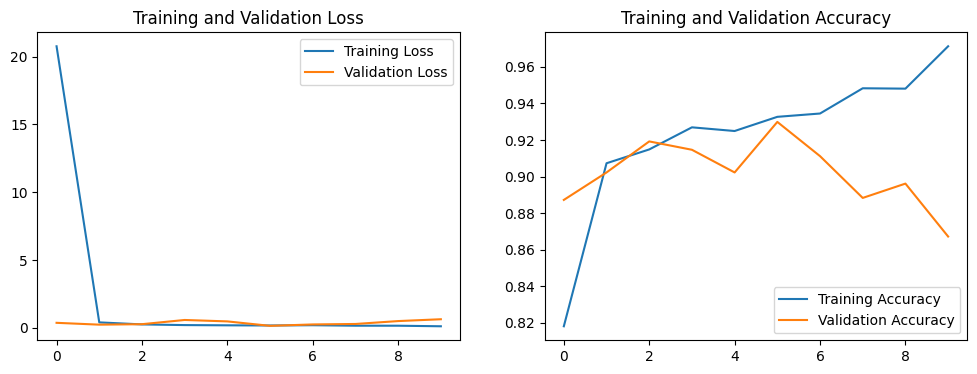

83/83 [==============================] - 1s 10ms/step
              precision    recall  f1-score     support
0              0.676923  0.880000  0.765217  150.000000
1              0.961538  0.877193  0.917431  513.000000
accuracy       0.877828  0.877828  0.877828    0.877828
macro avg      0.819231  0.878596  0.841324  663.000000
weighted avg   0.897146  0.877828  0.882994  663.000000
[[132  18]
 [ 63 450]]


In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16

SEED_VALUE = 42

# Fix seed to make training deterministic.
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

# Define the image dimensions
img_rows, img_cols = 256, 256

# Define the batch size and number of epochs
batch_size = 8
epochs = 10

# Define the path to the dataset
dataset_path = "/content/drive/MyDrive/Colab Notebooks/AR (1)/AR_out"

# Load the dataset
X = []
y = []

# ---------------------------- Modified Part - Gender ------------------------------------

feature_id_to_glasses = {
    '8': 'glasses',
    '9': 'glasses',
    '10': 'glasses',
    '22': 'glasses',
    '23': 'glasses',
    '24': 'glasses',
    # Add other mappings if necessary
}

for filename in os.listdir(dataset_path):
    if filename.endswith(".jpg"):
        glasses_id = filename.split('-')[2].split('.')[0]  # Extract the glasses identifier from the filename
        glasses = feature_id_to_glasses.get(glasses_id, 'no_glasses')  # Map the glasses identifier to a glasses label
        img = load_img(os.path.join(dataset_path, filename), target_size=(img_rows, img_cols))
        X.append(img_to_array(img))
        y.append(glasses)

unique_glasses = list(set(y))
print("Detected classes:", unique_glasses)

glasses_to_int = {glasses: i for i, glasses in enumerate(unique_glasses)}
y = [glasses_to_int[glasses] for glasses in y]

num_classes = len(unique_glasses)
print("Classes Number: ", num_classes)

y = to_categorical(y, num_classes)
# ----------------------------------------------------------------------------------

# Re-shape
X = np.array(X).reshape(-1, img_rows, img_cols, 3)
y = np.array(y)

# After loading and preprocessing the data
print("Shape of X:", np.shape(X))
print("Shape of y:", np.shape(y))


# Split the dataset into training/validation and test subsets
# 20% - Test || 20% - Validation || 60% - Train
# After splitting the data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED_VALUE)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=SEED_VALUE)  # 0.25 x 0.8 = 0.2

# After splitting the data
print("Shape of X_train:", np.shape(X_train))
print("Shape of y_train:", np.shape(y_train))
print("Shape of X_val:", np.shape(X_val))
print("Shape of y_val:", np.shape(y_val))
print("Shape of X_test:", np.shape(X_test))
print("Shape of y_test:", np.shape(y_test))

# Create the model
def cnn_model(input_shape=(img_rows, img_cols, 3), num_classes=num_classes):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Create the ID model
cnn_model = cnn_model(input_shape=(img_rows, img_cols, 3), num_classes=num_classes)
cnn_model.compile(optimizer=RMSprop(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Train the ID model
print("Training the ID model...")

# Create data generators
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

# Training loop using train_on_batch
train_loss = []
train_acc = []
val_loss = []
val_acc = []

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")

    train_loss_epoch = []
    train_acc_epoch = []
    val_loss_epoch = []
    val_acc_epoch = []

    for step in range(len(X_train) // batch_size):
        X_batch, y_batch = next(train_generator)
        loss, acc = cnn_model.train_on_batch(X_batch, y_batch) # Change Network Architectures (CNN or VGG)
        train_loss_epoch.append(loss)
        train_acc_epoch.append(acc)

    for step in range(len(X_val) // batch_size):
        X_batch, y_batch = next(val_generator)
        loss, acc = cnn_model.test_on_batch(X_batch, y_batch) # Change Network Architectures (CNN or VGG)
        val_loss_epoch.append(loss)
        val_acc_epoch.append(acc)

    avg_train_loss = np.mean(train_loss_epoch)
    avg_train_acc = np.mean(train_acc_epoch)
    avg_val_loss = np.mean(val_loss_epoch)
    avg_val_acc = np.mean(val_acc_epoch)

    print(f"Train - Loss: {avg_train_loss}, Accuracy: {avg_train_acc}")
    print(f"Validation - Loss: {avg_val_loss}, Accuracy: {avg_val_acc}")

    train_loss.append(avg_train_loss)
    train_acc.append(avg_train_acc)
    val_loss.append(avg_val_loss)
    val_acc.append(avg_val_acc)

# Calculate the average loss and accuracy over all epochs
avg_train_loss_all_epochs = round(np.mean(train_loss),3)
avg_train_acc_all_epochs = round(np.mean(train_acc), 3)
avg_val_loss_all_epochs = round(np.mean(val_loss), 3)
avg_val_acc_all_epochs = round(np.mean(val_acc), 3)

# Average in Training
print(f"Train - Average Loss over all epochs: {avg_train_loss_all_epochs}, Average Accuracy over all epochs: {avg_train_acc_all_epochs}")
print(f"Validation - Average Loss over all epochs: {avg_val_loss_all_epochs}, Average Accuracy over all epochs: {avg_val_acc_all_epochs}")


# Create a test data generator
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow(X_test, y_test, batch_size=batch_size)

# Test loop
test_loss = []
test_acc = []

print("Testing the model...")

for step in range(len(X_test) // batch_size):
    X_batch, y_batch = next(test_generator)
    loss, acc = cnn_model.test_on_batch(X_batch, y_batch)
    test_loss.append(loss)
    test_acc.append(acc)

avg_test_loss = round(np.mean(test_loss), 3)
avg_test_acc = round(np.mean(test_acc), 3)

print(f"Test - Loss: {avg_test_loss}, Accuracy: {avg_test_acc}")


# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.show()


# Predict the classes
y_pred = cnn_model.predict(X_test, batch_size=batch_size)
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute classification report
report = classification_report(y_test_classes, y_pred_classes, labels=list(range(num_classes)), output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Print the report
print(report_df)

# Compute confusion matrix
confusion_mat = confusion_matrix(y_test_classes, y_pred_classes)
print(confusion_mat)


